In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble  import GradientBoostingRegressor
df = pd.read_csv("data/Hitters.csv")
df.dropna(axis = 0, inplace= True)
y = df["Salary"]
dms = pd.get_dummies(df[["Division","NewLeague","League"]])
x_ = df.drop(["Salary","Division","League","NewLeague"],axis = 1)
x = pd.concat([x_,dms[["League_N","Division_W","NewLeague_N"]]],axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state= 42,test_size= 0.25)

In [3]:
gbm_model = GradientBoostingRegressor().fit(x_train,y_train)

In [7]:
import numpy as np
np.sqrt(mean_squared_error(y_test,gbm_model.predict(x_test)))

349.5193712928933

In [8]:
gbm_model.feature_importances_

array([2.99629580e-02, 1.48703079e-02, 1.14649642e-02, 4.98331272e-02,
       7.58864213e-02, 6.89864713e-02, 2.78912576e-02, 7.07116053e-02,
       2.48174112e-01, 5.07924186e-02, 4.71340184e-02, 1.96367165e-01,
       3.08731181e-02, 6.47228826e-02, 5.82901622e-03, 4.50061768e-03,
       9.74519221e-04, 5.99355213e-05, 9.65083785e-04])

In [10]:
xf = pd.DataFrame({"importance": gbm_model.feature_importances_*100},index= list(x_train))

<Axes: >

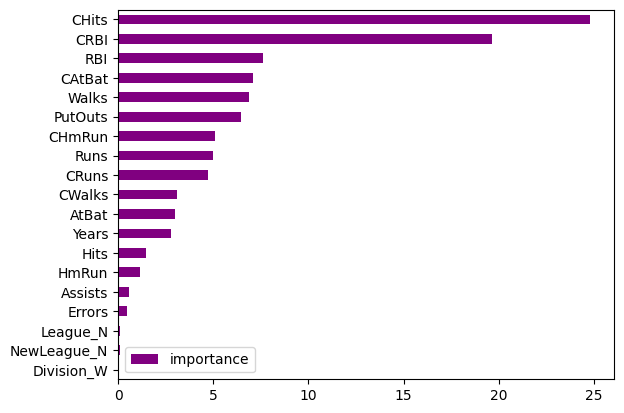

In [13]:
xf.sort_values(by = "importance",
               ascending= True,
               axis = 0).plot(kind = "barh", color = "purple")